# High Level Approach to Data Processing

* If recorded on iPhone, split the audio from each microphone into its own sample
* Break down the data into n second chunks. 
* Assess audio data before the ramping up and ramping down of the angle grinder 
* Store audio data in two different 
* Convert the sound data into the frequency domain. 
* Create frequency bins 
* Append 0 or 1 depending on angle grinder or not 

# FFT of Sound Signals

In [35]:
import scipy.io.wavfile
from scipy.io.wavfile import read
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import scipy.io.wavfile as wav
from numpy.lib import stride_tricks
import pandas as pd
import os
import math

## Import the Signal

### y will have two columns in the nd array. There are two microphones on the iPhone

In [47]:
# good for seeing if the chunk is empty noise or not 
test = y0[0:math.floor(3 * samplerate)]

print(test.max())

0.45916808


<ipython-input-48-e83d17431efe>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate,y=wav.read("C:/Users/adamf/OneDrive/Documents/university/UBC/homework_Winter_2021/IGEN_330/BikeSentry_data/angle-grinders/blue-4m.wav")
<ipython-input-48-e83d17431efe>:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1,y2=wav.read("C:/Users/adamf/OneDrive/Documents/university/UBC/homework_Winter_2021/IGEN_330/BikeSentry_data/angle-grinders/red-4m.wav")


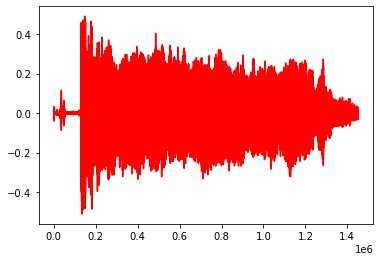

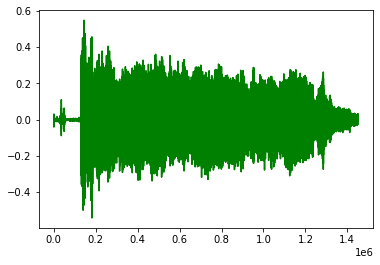

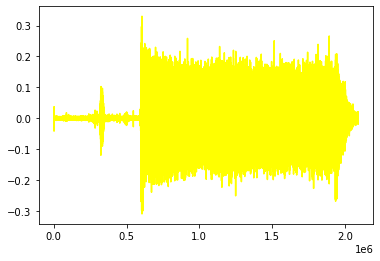

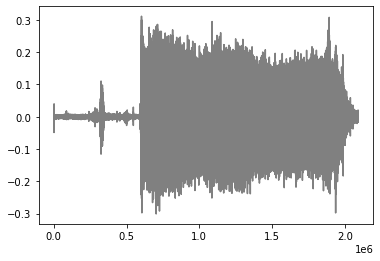

In [48]:
samplerate,y=wav.read("C:/Users/adamf/OneDrive/Documents/university/UBC/homework_Winter_2021/IGEN_330/BikeSentry_data/angle-grinders/blue-4m.wav") 
pd.DataFrame(y)
samplerate1,y2=wav.read("C:/Users/adamf/OneDrive/Documents/university/UBC/homework_Winter_2021/IGEN_330/BikeSentry_data/angle-grinders/red-4m.wav") 

y0 = y[:, 0]
y1 = y[:, 1]

y3 = y2[:, 0]
y4 = y2[:, 1]
plt.plot(y0, c = 'red')
plt.show()
plt.plot(y1, c = 'green')
plt.show()
plt.plot(y3, c = 'yellow')
plt.show()
plt.plot(y4, c = 'grey')
plt.show()

In [3]:
blue_audio_data = {}
red_audio_data = {}
for root, dirs, files in os.walk("C:/Users/adamf/OneDrive/Documents/university/UBC/homework_Winter_2021/IGEN_330/BikeSentry_data/angle-grinders/"):
    for file in files:
        if("blue" in file):
            blue_audio_data[file + "_samplerate"], blue_audio_data[file] = wav.read(root + file)
        if("red" in file):
            red_audio_data[file + "_samplerate"], red_audio_data[file] = wav.read(root + file)


<ipython-input-3-57d02c6ccca9>:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  blue_audio_data[file + "_samplerate"], blue_audio_data[file] = wav.read(root + file)
<ipython-input-3-57d02c6ccca9>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  red_audio_data[file + "_samplerate"], red_audio_data[file] = wav.read(root + file)


In [4]:
print(blue_audio_data.keys())

dict_keys(['blue-1m.wav_samplerate', 'blue-1m.wav', 'blue-2m.wav_samplerate', 'blue-2m.wav', 'blue-4m.wav_samplerate', 'blue-4m.wav', 'blue-7m.wav_samplerate', 'blue-7m.wav'])


In [5]:
blue_audio_data["blue-1m.wav_samplerate"]

44100

In [6]:
from IPython.display import Audio
Audio(y0, rate=samplerate)

In [49]:
Audio(y3, rate=samplerate)

## Finding the Frequnecies of the Signal

#### Note: going to omit id, distance and inside / outside from the data as we will not have that data in the field. Model should be robust enough to identify without these parameters 

In [26]:
def rawAudioToFreq(arr: np.array):
    n = len(y0)                       # length of the signal
    n_array = np.array((np.zeros(n), n))
    k = np.arange(n)
    T = n/samplerate
    frq = k/T # two sides frequency range
    zz=int(n/2)
    freq = frq[range(zz)]           # one side frequency range
    Y0 = np.fft.fft(y0)/n              # fft computing and normalization
    Y0 = Y0[range(zz)]
    n_array[:, 0], n_array[0, :] = Y0, freq
#     freq_list.append(freq)
#     amp_list.append(Y0)
    
    return n_array
    

In [22]:
blue_freqs = []
blue_amps = []
for key in blue_audio_data:
    if "_sample" in key:
        continue
    else:
        # dist = [int(i) for i in key.split() if i.isdigit()][0]# extracts the integer from key as list
        rawAudioToFreq(blue_audio_data[key], blue_freqs, blue_amps)

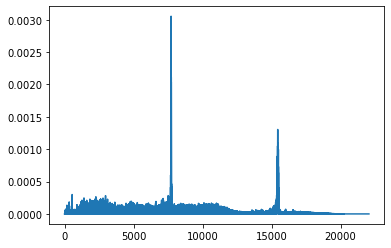

In [23]:
plt.plot(blue_freqs[0], abs(blue_amps[0]))

In [ ]:
n = len(y0)                       # length of the signal
k = np.arange(n)
T = n/samplerate
frq = k/T # two sides frequency range
zz=int(n/2)
freq = frq[range(zz)]           # one side frequency range
Y0 = np.fft.fft(y0)/n              # fft computing and normalization
Y0 = Y0[range(zz)]

In [ ]:
plt.plot(freq, abs(Y0), 'r-')
plt.xlabel('freq (Hz)')
plt.ylabel('|Y0(freq)|')
#plt.xlim([0,200])